<a href="https://colab.research.google.com/github/Ahmed-Jebril/Titanic_EDA/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
round(df.isna().mean() * 100 ,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

## 1. Impute Missing Values in "Embarked" feature instead of Dropping

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
most_frequent_category=df['Embarked'].mode()[0]
most_frequent_category

'S'

In [ ]:
df.Embarked.fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 2. Combining family number related features into one called "family_size"
 & exploring its Survival Rate

In [ ]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df = df.eval('family_size = Parch + SibSp')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.family_size.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_size, dtype: int64

In [ ]:
df.groupby('family_size').Survived.mean()

family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

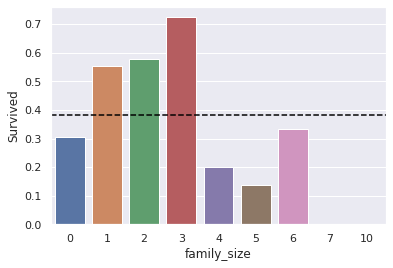

In [ ]:
# plot family_size vs survived
sns.barplot(x='family_size', y='Survived', data=df, ci=None);
plt.axhline(df.Survived.mean(), color='black', linestyle='--');
plt.show()

## 3. Number of passengers that were alone
& Their Survival Rate

In [ ]:
df.family_size.value_counts()[0]

537

In [ ]:
df.groupby('family_size').Survived.mean()[0]*100

30.353817504655495

## 4. Top 3 categories from "family_size" that have highest survival Rate ?
Hint : search for sort_values and nlargest methods

In [ ]:
df_1 = df.groupby('family_size').Survived.mean()
df_1.sort_values(ascending=False,inplace=True)
df_1.head(10)

family_size
3     0.724138
2     0.578431
1     0.552795
6     0.333333
0     0.303538
4     0.200000
5     0.136364
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [ ]:
Rank_1 = df_1[0]
print('Number one highest survival Rate is family size:',df_1.index[0],'  ,with rate of:',"%.2f" %(Rank_1*100),'%')

Number one highest survival Rate is family size: 3   ,with rate of: 30.35 %


##5. Splitting Age into groups
& estimating their survival rate

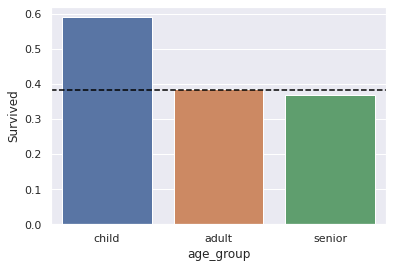

In [58]:
df['age_group'] = pd.cut(df.Age, bins=[0, 15, 45, 82], labels=['child', 'adult', 'senior'])

sns.barplot(x='age_group', y='Survived', data=df, ci=None);
plt.axhline(df.Survived.mean(), color='black', linestyle='--');
plt.show()

## 6. Survival Rate for different gender in these groups
Which age groups has the lowest and highest survival rate for both females and males?

In [65]:
df.groupby(['age_group','Sex']).Survived.mean()*100

age_group  Sex   
child      female    65.116279
           male      52.500000
adult      female    76.063830
           male      17.647059
senior     female    86.666667
           male      16.438356
Name: Survived, dtype: float64

# Insights

Female survival rate is higher than male's in all age groups

The lower the age the higher survival rate

Alone passenger does not have the highest survival rate as imagined but has good chance of 30%

